# Robo Concept/Planning

Congratulations on taking an interest in improving your results! Based on your current portfolio, your Sharpe Ratio is XXX.  The Sharpe Ratio is the best way to measure your risk-adjusted return.  The higher the Sharpe Ratio, the higher the returns and the sooner you can retire!

Based on a theoretical analysis of your portfolio, the most optimal Sharpe Ratio is XXX.  Keep in mind, it may not be possible to obtain this Sharpe Ratio based on the random nature of the market, but there are proven ways to help improve the portfolio's Sharpe Ratio.  Would you like to try to improve your portfolio?  XXX

Excellent!  Type "guide" for guided assistnace or "self" to self. XXX

- Are you satisfied with you current mix of stocks or would you like to add or remove stocks? Type "keep stocks", "add Stocks" or "remove stocks" XXX
- What stock would you like to add? XXX
-- We need to understand how you want this new stock added.  Do you want to add this stock assume the same buy/sell as a current stock or do you want to define a new transation strategy? XXX
---- What stock do you want it to mirror? XXX
---- What day to you want to make the first purchase? XXX
---- What total $ investment to you want to make for the first purchase? XXX
- What stock would you like to remove? XXX
-- Do you want to replace this stock with another ticker or move entirely? XXX

portfolio sharpe ratio
max sharpe ratio
stock to add

for added stock
- date of first buy
- invested amount of first buy
- frequency of new buys
- $ of frequecy buys
- date of first sell
- frequency of new sells

stock to remove
for removed stock
- replace with X ticker

input robo
portfolio sharpe ratio
max sharpe ratio
current transaction_df

output robo
new transaction DF

# Test Data to Test Robo Code

In [1]:
import csv
from pathlib import Path
import pandas as pd
from pandas import DataFrame
from datetime import datetime
from datetime import date
import yfinance as yf

In [2]:
# Set the path for the CSV file
input_file_path = Path("TestPortfolio.csv")

In [3]:
#Create empty list to store row data from CSV
portfolio_transactions = []

In [4]:
#Open the CSV file; read in row data; calculate transaction cost per transacation
with open(input_file_path, 'r') as csvfile:
    
    #Set reader object
    csvreader = csv.reader(csvfile, delimiter = ',')
 
    #Read the header
    csv_header = next(csvreader)
    
    #Create new column
    csv_header.append("Transaction Cost")
    portfolio_transactions.append(csv_header)

    #Iterate through the data 
    for row in csvreader:
        
        #Calculate transaction cost
        cost = float(row[3]) * float(row[4])
        
        #Append transaction cost to list  
        row.append(cost)
        portfolio_transactions.append(row)

In [5]:
#Convert transaction list to dataframe
portfolio_df = pd.DataFrame(portfolio_transactions, columns=['Ticker', 'Transaction', 'Date', 'Transaction Price', 'Number of shares', 'Transaction Cost'])

#Drop first row (duplicate header)
portfolio_df=portfolio_df.drop(portfolio_df.index[0])

portfolio_df

,Ticker,Transaction,Date,Transaction Price,Number of shares,Transaction Cost
1,AAPL,B,3/5/12,77.8,100,7780
2,AAPL,B,4/1/13,60.57,100,6057
3,TSLA,B,9/23/13,189.9,100,18990
4,TSLA,S,11/18/13,122.38,75,9178.5
5,TSLA,B,5/9/16,208,30,6240
6,GOOG,B,8/7/17,915.39,10,9153.9
7,AAPL,S,3/16/20,240,50,12000


In [6]:
#Convert Date to datetime and set as index
portfolio_df['Date']=pd.to_datetime(portfolio_df['Date'])
portfolio_df.set_index(['Date'], inplace=True)

portfolio_df

,Ticker,Transaction,Transaction Price,Number of shares,Transaction Cost
Date,,,,,
2012-03-05,AAPL,B,77.8,100,7780
2013-04-01,AAPL,B,60.57,100,6057
2013-09-23,TSLA,B,189.9,100,18990
2013-11-18,TSLA,S,122.38,75,9178.5
2016-05-09,TSLA,B,208,30,6240
2017-08-07,GOOG,B,915.39,10,9153.9
2020-03-16,AAPL,S,240,50,12000


In [7]:
# Sort dataframe in ascending order
portfolio_df.sort_index(inplace=True)

portfolio_df

,Ticker,Transaction,Transaction Price,Number of shares,Transaction Cost
Date,,,,,
2012-03-05,AAPL,B,77.8,100,7780
2013-04-01,AAPL,B,60.57,100,6057
2013-09-23,TSLA,B,189.9,100,18990
2013-11-18,TSLA,S,122.38,75,9178.5
2016-05-09,TSLA,B,208,30,6240
2017-08-07,GOOG,B,915.39,10,9153.9
2020-03-16,AAPL,S,240,50,12000


In [8]:
#inputs into robo function
portfolio_sharpe_ratio = 0.5004989069079389
best_sharpe_ratio = 0.7199297636662322

# Robo Code

In [9]:
def get_closing_price (ticker):
    stock_info = yf.Ticker(ticker)

    # get historical market data
    hist = stock_info.history(period="max")
    hist2=hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
    return hist2

In [10]:
print(f"Congratulations on taking an interest in improving your results! Based on your current portfolio, your Sharpe Ratio is {portfolio_sharpe_ratio:.2f}.  The Sharpe Ratio is the best way to measure your risk-adjusted return.  The higher the Sharpe Ratio, the higher the returns and the sooner you can retire!")


Congratulations on taking an interest in improving your results! Based on your current portfolio, your Sharpe Ratio is 0.50.  The Sharpe Ratio is the best way to measure your risk-adjusted return.  The higher the Sharpe Ratio, the higher the returns and the sooner you can retire!


In [11]:
print(f"Based on a theoretical analysis of your portfolio, the most optimal Sharpe Ratio is {best_sharpe_ratio:.2f}. Keep in mind, it may not be possible to obtain this Sharpe Ratio based on the random nature of the market, but there are proven ways to help improve the portfolio's Sharpe Ratio.")
ui_improve = input ("\nWould you like to try to improve your portfolio? (Yes or No)")


Based on a theoretical analysis of your portfolio, the most optimal Sharpe Ratio is 0.72. Keep in mind, it may not be possible to obtain this Sharpe Ratio based on the random nature of the market, but there are proven ways to help improve the portfolio's Sharpe Ratio.



Would you like to try to improve your portfolio? (Yes or No) Yes


In [12]:
# Define empty lists for user inputs
add_list = []
remove_list = []

In [22]:
# Enter if user wants to improve portfolio
if (ui_improve.lower() == "yes" or ui_improve.lower() == "y"):
    print("Great! Let's get started! I will ask you a series of questions to help modify your portfolio to see if we can improve your performance.")
    print("\nThere's a few things to keep in mind.")
    print("\t* Rule 1")

    # Ask if user wants to keep/add/remove stocks
    ui_stock_change = input ("\nAre you satisfied with you current mix of stocks or would you like to add or remove stocks? (keep, add, remove)")
 

    # Enter if user wants to add stocks
    if (ui_stock_change.lower() == "add"):
        ui_stock_add_num = input ("\nHow many stocks would you like to add to your portfolio?")
        print(f"Great! We'll add the {ui_stock_add_num} stocks one at a time.")
        
        # Loop to gather ticker, investment $, and purchase date for each ticker
        for i in range(int(ui_stock_add_num)):
            ui_stock_add_tckr = input (f"\nWhat is the ticker for Stock {i+1} that you want to add?")
            stock_add_tckr = ui_stock_add_tckr.upper()
          
            ui_stock_add_date = input (f"\nWhat day do you want to buy {stock_add_tckr}? (MM/DD/YYYY)")
            stock_add_date = datetime.strptime(ui_stock_add_date, '%m/%d/%Y').date()

            #Grab closing price data
            stock_add_closing_df = get_closing_price(stock_add_tckr)
            stock_add_closing_price = stock_add_closing_df.loc[stock_add_date]["Close"]            
            
            ui_stock_add_cost = input (f"\nFor the analysis, we'll assume only the inital purchase as the full investment. How much would you like to invest in {stock_add_tckr}? $")
            stock_add_cost = ui_stock_add_cost.replace(',','')
            
            #Calculate number of shares
            stock_add_num_shares = round(int(stock_add_cost) / int(stock_add_closing_price), 0)
            
            add_list.append([stock_add_date, stock_add_tckr, "B", stock_add_closing_price, stock_add_num_shares, stock_add_cost])
 

    # Enter if user wants to remove stocks
    elif (ui_stock_change.lower() == "remove"):
        ui_stock_remove_num = input ("\nHow many stocks would you like to remove from your portfolio?")
        
        # Loop to gather all tickers to remove from portfolio
        for i in range(int(ui_stock_remove_num)):
            ui_stock_remove_tckr = input (f"\nWhat is the ticker for Stock {i+1} that you want to remove?")
            stock_remove_tckr = ui_stock_remove_tckr.upper()
            print(f"{stock_remove_tckr} will be removed from your portfolio.")
            remove_list.append(stock_remove_tckr)
   

    # Enter if user does not want to add or remove stocks
    else:
        print(f"\nOkay, we won't change your mix of stocks.  Your stocks will remain: \n{stock_list}")

        
# Enter if user does not want to improve portflio.    
else:
    print("If you change your mind, let me know.")

Great! Let's get started! I will ask you a series of questions to help modify your portfolio to see if we can improve your performance.

There's a few things to keep in mind.
	* Rule 1



Are you satisfied with you current mix of stocks or would you like to add or remove stocks? (keep, add, remove) remove

How many stocks would you like to remove from your portfolio? 1

What is the ticker for Stock 1 that you want to remove? aapl


AAPL will be removed from your portfolio.


In [15]:
add_list

[[datetime.date(2018, 2, 27), 'CRON', 'B', 7.62, 14286.0, '100000'],
 [datetime.date(2020, 1, 6), 'SHOP', 'B', 413.33, 484.0, '200000']]

In [23]:
remove_list

['GOOG', 'AAPL']

In [32]:
def create_new_transaction_df (add_list, remove_list, starting_df):
    # Remove unwanted tickers from starting_df
    for i in range(len(remove_list)):
        starting_df.drop(starting_df.loc[starting_df['Ticker']==remove_list[i]].index, inplace=True)
    
    # Create dataframe of new transactions in add_list
    # Store column names from starting df in list
    df = starting_df.reset_index()
    column_names=list(df.columns)
    
    # Convert add_list to a df
    user_inputs_df = pd.DataFrame(add_list, columns=column_names)
    
    # Convert Date to datetime and set as index
    user_inputs_df['Date']=pd.to_datetime(user_inputs_df['Date'])
    user_inputs_df.set_index(['Date'], inplace=True)
    
    # Concatenate new dataframe with starting dataframe 
    new_trans_df = pd.concat([starting_df, user_inputs_df])
    
    return new_trans_df

In [33]:
test = create_new_transaction_df(add_list, remove_list, portfolio_df)
test

,Ticker,Transaction,Transaction Price,Number of shares,Transaction Cost
Date,,,,,
2013-09-23,TSLA,B,189.9,100,18990
2013-11-18,TSLA,S,122.38,75,9178.5
2016-05-09,TSLA,B,208,30,6240
2018-02-27,CRON,B,7.62,14286,100000
2020-01-06,SHOP,B,413.33,484,200000


# Portfolio Projections Based on mean and standard deviations

## Inputs needed for portfolio projections

In [112]:
import random

In [149]:
balance = 10000
contribution = 1000
years = 20
mu = 0.0614
sigma = 0.2317
monte_runs = 1000

In [121]:
def portfolio_projection (starting_balance, yearly_contribution, num_of_years, mean, std_dev):
    balance_projection = starting_balance
    projection_list = []
    for i in range(num_of_years):
        yrly_rtn = random.gauss(mu, sigma)
        balance_projection = (balance_projection + yearly_contribution)*(1 + yrly_rtn)
        projection_list.append(balance_projection)
    return projection_list

In [122]:
def monte_portfolio_projection (starting_balance, yearly_contribution, num_of_years, mean, std_dev, num_of_iterations):
    projection_list = []
    for i in range(num_of_iterations):
        iteration = portfolio_projection(starting_balance, yearly_contribution, num_of_years, mean, std_dev)
        projection_list.append(iteration)
    return projection_list

In [150]:
result = monte_portfolio_projection(balance, contribution, years, mu, sigma, monte_runs)

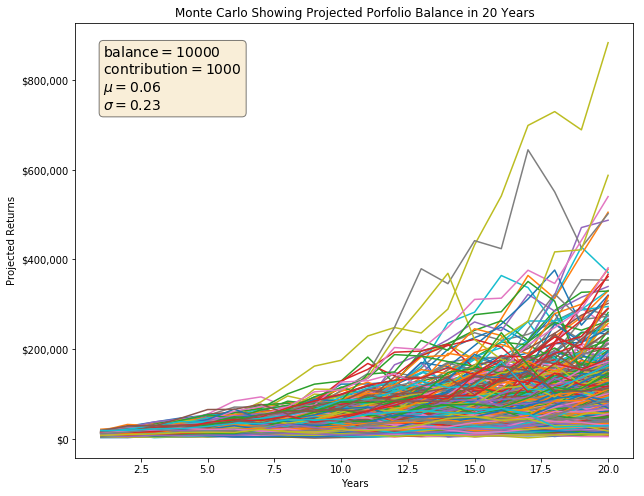

In [169]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10,8))
plt.xlabel("Years")
plt.ylabel("Projected Returns")
plt.title(f"Monte Carlo Showing Projected Porfolio Balance in {years} Years")

textstr = '\n'.join((
    r'$\mathrm{balance}=%.0f$' % (balance, ),
    r'$\mathrm{contribution}=%.0f$' % (contribution, ),
    r'$\mu=%.2f$' % (mu, ),
    r'$\sigma=%.2f$' % (sigma, )))

for i in range(monte_runs):
    plt.plot([i+1 for i in range(len(result[0]))],[result[i][j] for j in range(len(result[0]))])

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.show()